## This script is to craete an empty smirk environment image with no objects in it. Also draw the 6 ROI regions on it.

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
rgb_0_path = '../datasets/smirk/child/9jJxC2pmKULPI8arYKQ5O/cam000180.png'
rgb_1_path = '../datasets/smirk/child/9jJxC2pmKULPI8arYKQ5O/cam000200.png'

anno_0_path = '../datasets/smirk/child/9jJxC2pmKULPI8arYKQ5O/cam000180.labels.png'
anno_1_path = '../datasets/smirk/child/9jJxC2pmKULPI8arYKQ5O/cam000200.labels.png'

bgr_0 = cv2.imread(rgb_0_path, cv2.IMREAD_UNCHANGED)
bgr_1 = cv2.imread(rgb_1_path, cv2.IMREAD_UNCHANGED)
anno_0_gray = cv2.imread(anno_0_path, cv2.IMREAD_GRAYSCALE)

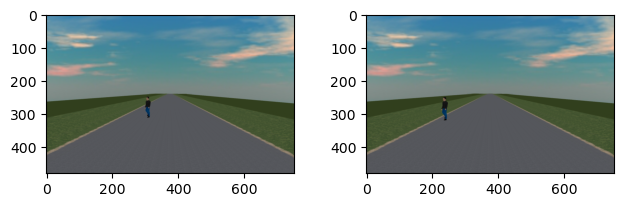

In [3]:
fig = plt.figure()
sfigs = fig.subfigures(1, 2)
axs_0 = sfigs[0].subplots(1,1)
axs_1 = sfigs[1].subplots(1,1)

axs_0.imshow(cv2.cvtColor(bgr_0, cv2.COLOR_BGR2RGB))
axs_1.imshow(cv2.cvtColor(bgr_1, cv2.COLOR_BGR2RGB))

In [4]:
ret, binary_0 = cv2.threshold(anno_0_gray, 0, 255, cv2.THRESH_BINARY)

In [5]:
pt = np.argwhere(binary_0 == 255)

In [6]:
min_y, min_x = np.min(pt[:],axis=0)  
max_y, max_x = np.max(pt[:],axis=0)   

In [7]:
ped_bbox_bgr_0 = bgr_0[min_y:max_y, min_x:max_x, :]

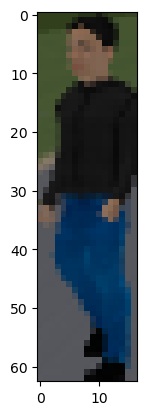

In [8]:
plt.imshow(cv2.cvtColor(ped_bbox_bgr_0, cv2.COLOR_BGR2RGB))

In [9]:
bgr_0_copy = bgr_0.copy()
bgr_0_copy[min_y-30:max_y+30, min_x-30:max_x+30, :] = bgr_1[min_y-30:max_y+30, min_x-30:max_x+30, :]

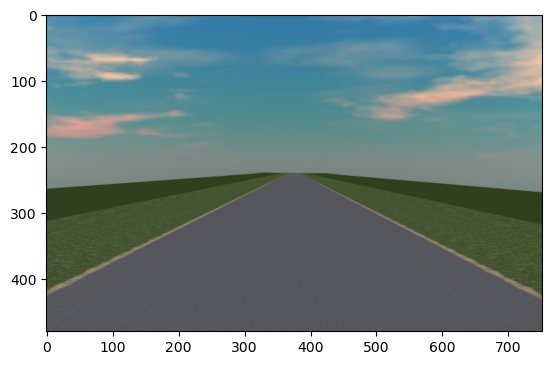

In [10]:
plt.imshow(cv2.cvtColor(bgr_0_copy, cv2.COLOR_BGR2RGB))

In [11]:
cv2.imwrite('empty_smirk.png', bgr_0_copy)

True

## Draw 6 ROI regions on the empty smirk.

In [12]:
empty_smirk = cv2.imread('./empty_smirk.png')
empty_smirk = cv2.resize(empty_smirk, (640, 480))

In [13]:
roi_top_left_cords = np.array([[120, 200], [180, 200], [240, 200],
                                [340, 200], [400, 200], [460, 200]])
roi_width = 60
roi_height = 120
roi_right_bottom_cords = [tl_cords + [roi_width, roi_height] for tl_cords in roi_top_left_cords]

In [14]:
empty_smirk_copy = empty_smirk.copy()
for i in range(len(roi_top_left_cords)):
    empty_smirk_copy = cv2.rectangle(empty_smirk_copy, roi_top_left_cords[i], roi_right_bottom_cords[i], (0,0,255), 1)

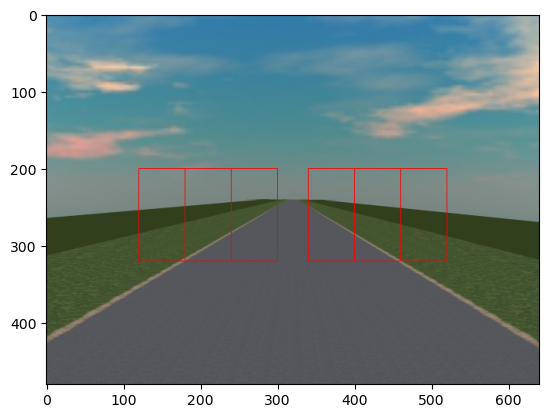

In [15]:
plt.imshow(cv2.cvtColor(empty_smirk_copy, cv2.COLOR_BGR2RGB))

In [16]:
cv2.imwrite('./empty_smirk_roi_draw.png', empty_smirk_copy)

True